✓ Données chargées avec succès
  - Python Euler : 7301 points
  - Python RK4   : 7301 points
  - C++ RK4      : 7301 points

Aperçu des données Python RK4 :
   temps         S         E         I         R
0    0.0  0.999000  0.000000  0.001000  0.000000
1    0.1  0.998950  0.000049  0.000987  0.000014
2    0.2  0.998901  0.000095  0.000975  0.000028
3    0.3  0.998853  0.000140  0.000965  0.000042
4    0.4  0.998805  0.000182  0.000957  0.000056
COMPARAISON PYTHON RK4 vs C++ RK4

Erreurs L2 (norme euclidienne) :
  S : 2.468683e-09
  E : 2.488996e-09
  I : 2.476628e-09
  R : 2.476092e-09

Erreur L2 totale : 9.910399e-09

Erreurs relatives maximales (%) :
  S : 7.337043e-08 %
  E : 4.098614e-05 %
  I : 1.715313e-05 %
  R : 9.092577e-05 %


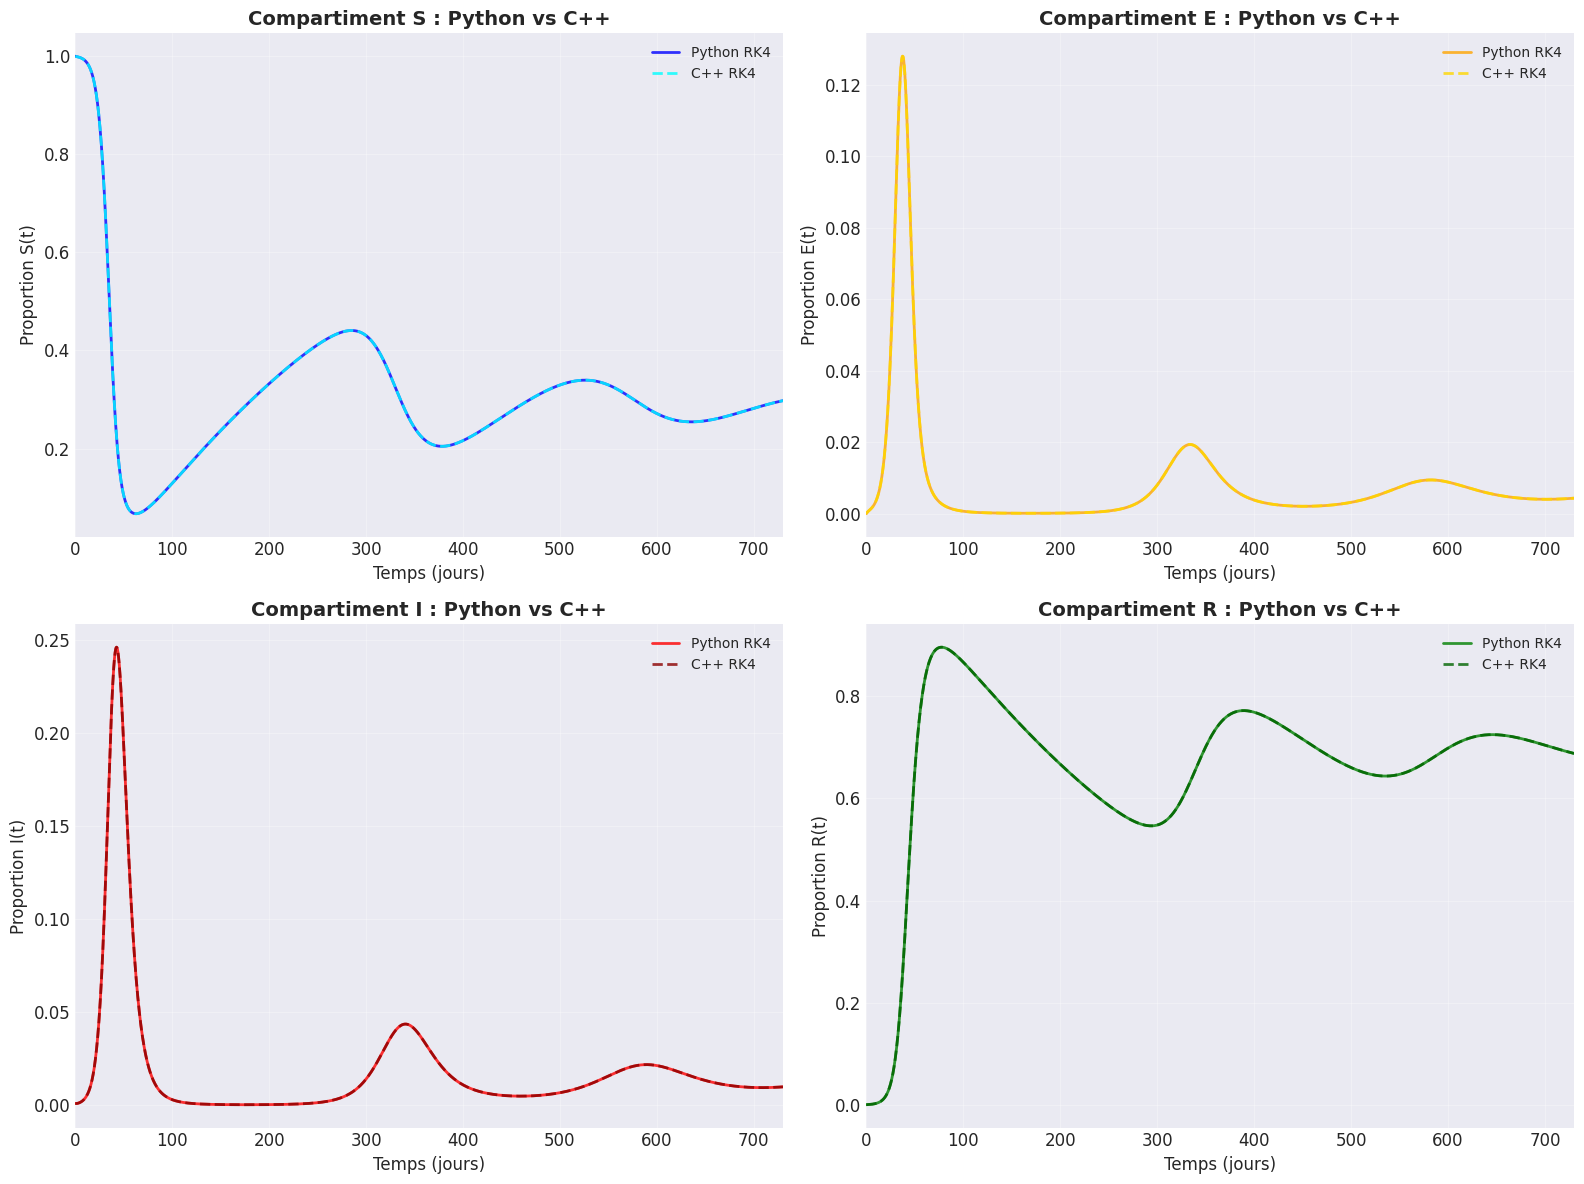

✓ Figure sauvegardée : comparison_python_cpp_rk4.png


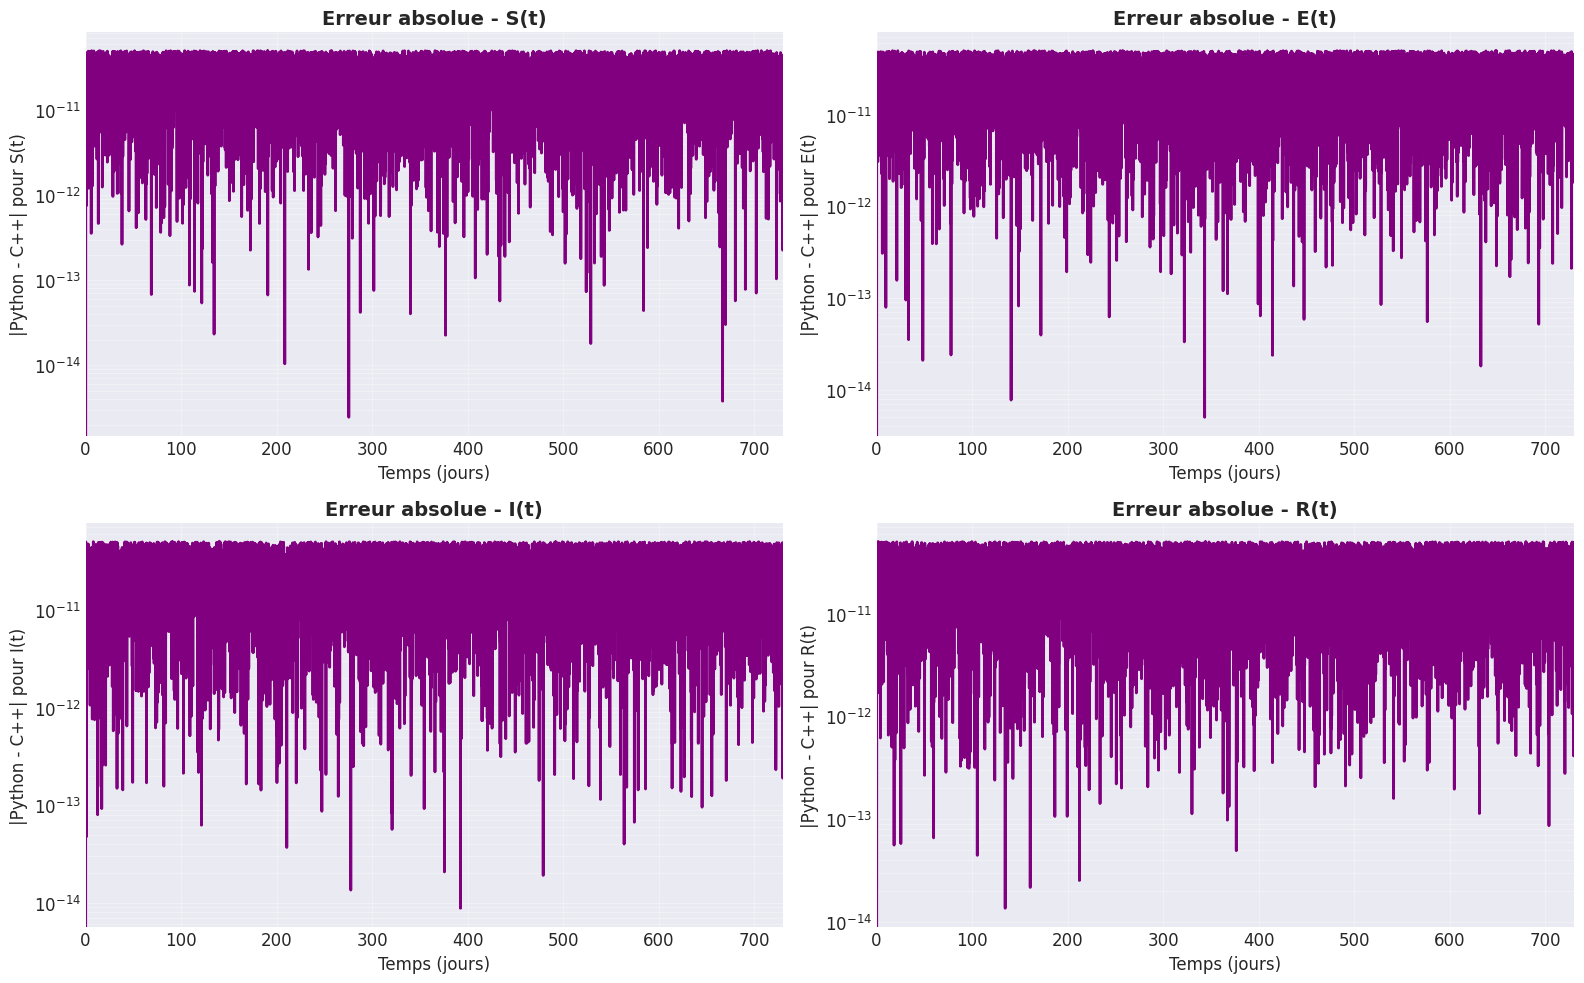

✓ Figure sauvegardée : error_python_cpp.png
COMPARAISON EULER vs RK4 (Python)

Erreurs L2 :
  S : 1.640273e-01
  E : 2.944773e-02
  I : 5.535231e-02
  R : 1.498097e-01

Erreur L2 totale : 3.986370e-01


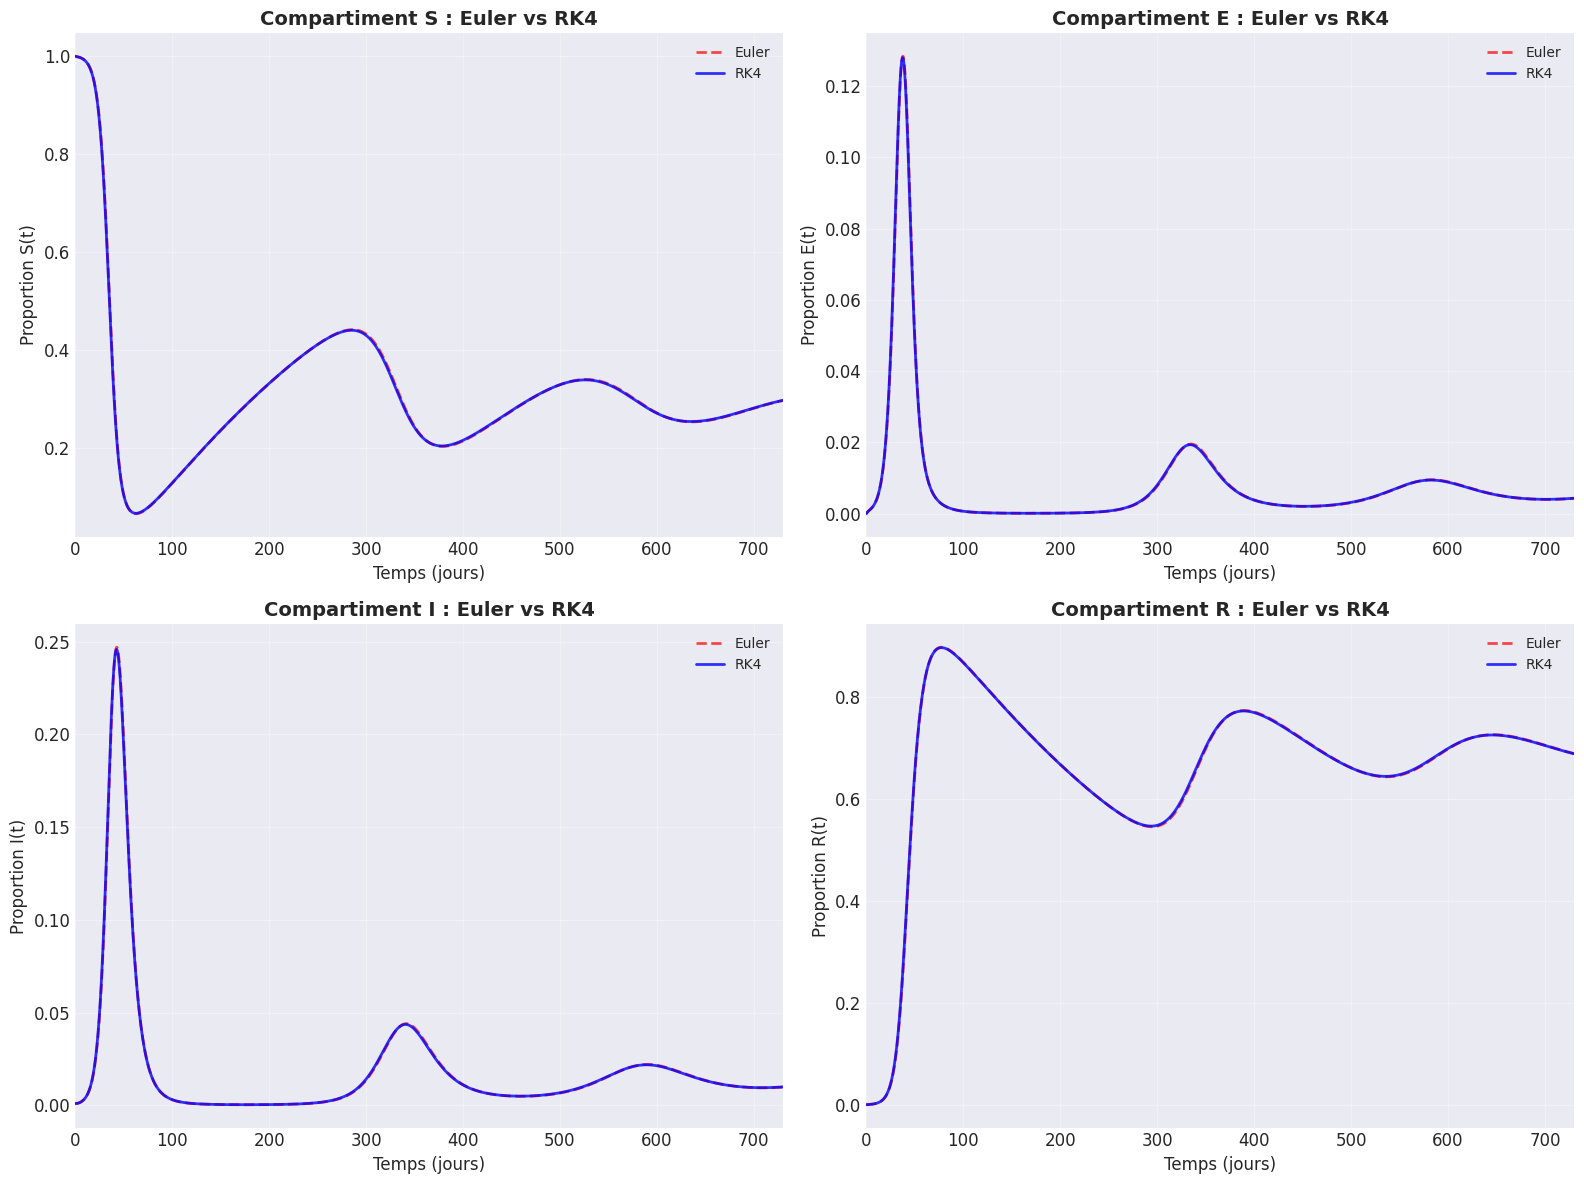

✓ Figure sauvegardée : comparison_euler_rk4.png


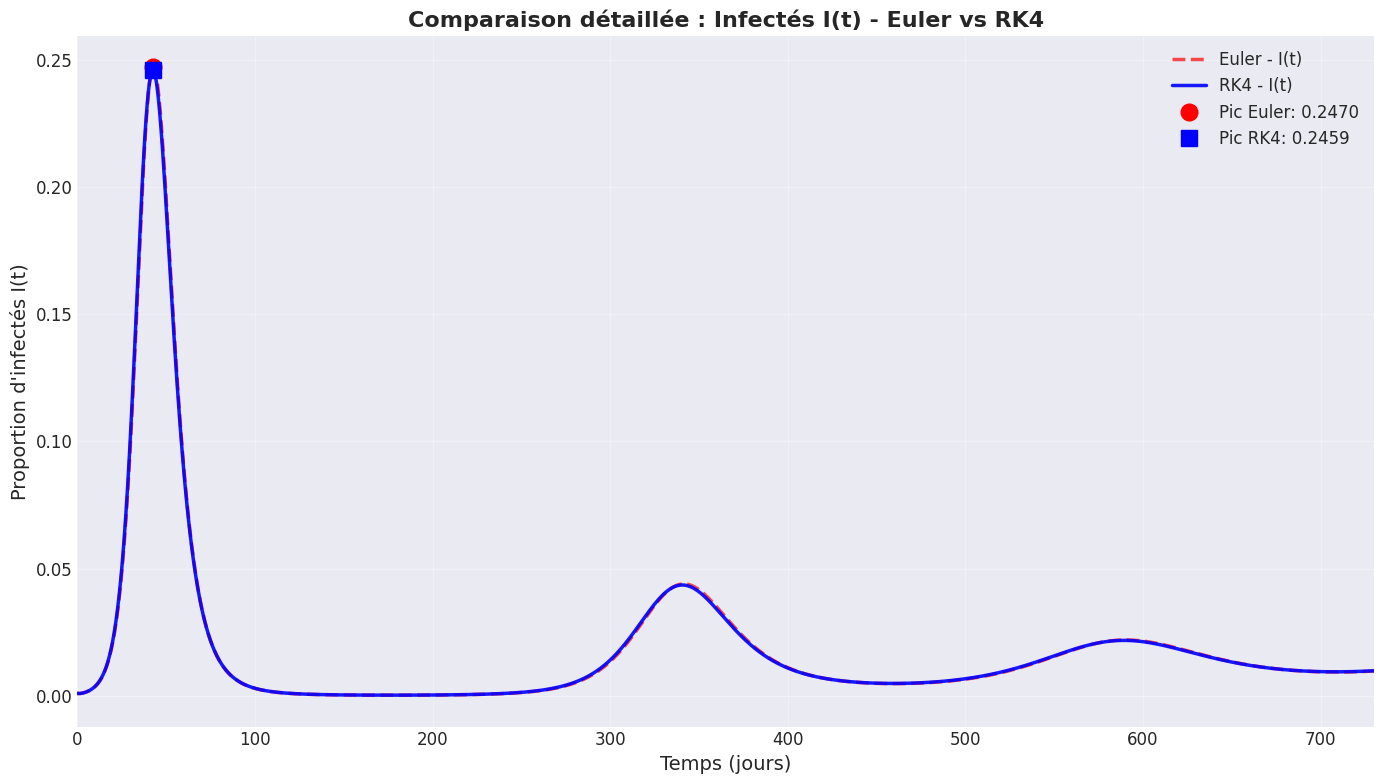

✓ Figure sauvegardée : focus_infected_euler_rk4.png
Calcul des solutions pour différents pas de temps...
  dt = 0.5...
  dt = 0.2...
  dt = 0.1...
  dt = 0.05...
  dt = 0.02...
  dt = 0.01...
✓ Calculs terminés


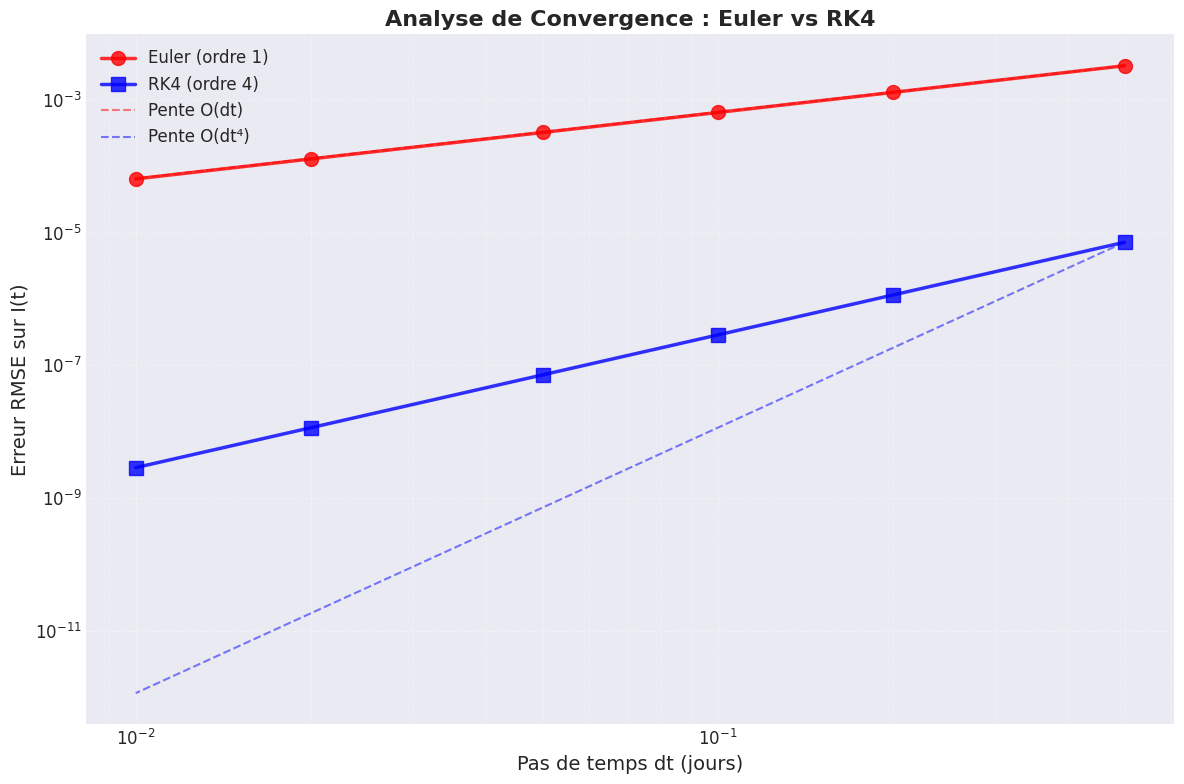

✓ Figure sauvegardée : convergence_complete.png
ORDRE DE CONVERGENCE EMPIRIQUE

Euler :
  Ordre empirique : 1.00
  Ordre théorique : 1.00
  R² régression   : 0.999996

RK4 :
  Ordre empirique : 2.00
  Ordre théorique : 4.00
  R² régression   : 1.000000
✓ Tableau de synthèse exporté : summary_partie1.csv

         Méthode  Pic I(t)  Temps pic (jours)  Ordre convergence
0  Python Euler  0.247049               42.8                1.0
1    Python RK4  0.245898               42.6                4.0
2       C++ RK4  0.245898               42.6                4.0

✓ ANALYSE PARTIE 1 TERMINÉE AVEC SUCCÈS

Fichiers générés :
  - comparison_python_cpp_rk4.png
  - error_python_cpp.png
  - comparison_euler_rk4.png
  - focus_infected_euler_rk4.png
  - convergence_complete.png
  - summary_partie1.csv


In [ ]:
"""
=============================================================================
PROJET M2 - PARTIE 1 : ANALYSE COMPARATIVE SEIRS
=============================================================================
Jupyter Notebook pour l'analyse des résultats numériques

OBJECTIFS :
1. Comparaison inter-langages (Python vs C++)
2. Comparaison inter-méthodes (Euler vs RK4)
3. Visualisations professionnelles
4. Analyse d'erreurs
=============================================================================
"""

# %% [markdown]
# # 📊 PROJET M2 - PARTIE 1 : Analyse SEIRS Numérique
# 
# ## Objectifs de l'analyse
# 
# 1. **Comparaison inter-langages** : Python RK4 vs C++ RK4
# 2. **Comparaison inter-méthodes** : Euler vs RK4 (Python)
# 3. **Analyse de convergence**
# 4. **Validation des implémentations**

# %% [markdown]
# ## 1. Importation des bibliothèques

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration pour des graphiques professionnels
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# %% [markdown]
# ## 2. Chargement des données

# %%
# Charger les fichiers CSV générés
df_python_euler = pd.read_csv('seirs_python_euler.csv')
df_python_rk4 = pd.read_csv('seirs_python_rk4.csv')
df_cpp_rk4 = pd.read_csv('seirs_cpp_rk4.csv')

print("✓ Données chargées avec succès")
print(f"  - Python Euler : {len(df_python_euler)} points")
print(f"  - Python RK4   : {len(df_python_rk4)} points")
print(f"  - C++ RK4      : {len(df_cpp_rk4)} points")

# Vérification de cohérence
print("\nAperçu des données Python RK4 :")
print(df_python_rk4.head())

# %% [markdown]
# ## 3. Comparaison 1 : Même méthode (RK4), langages différents

# %% [markdown]
# ### 3.1 Calcul de l'erreur L2 entre Python et C++

# %%
def compute_l2_error(y1, y2):
    """Calcule l'erreur L2 entre deux vecteurs."""
    return np.sqrt(np.sum((y1 - y2)**2))

def compute_relative_error(y1, y2):
    """Calcule l'erreur relative maximale."""
    return np.max(np.abs((y1 - y2) / (y1 + 1e-10))) * 100  # en %

# Erreurs L2 pour chaque compartiment
errors_l2 = {
    'S': compute_l2_error(df_python_rk4['S'].values, df_cpp_rk4['S'].values),
    'E': compute_l2_error(df_python_rk4['E'].values, df_cpp_rk4['E'].values),
    'I': compute_l2_error(df_python_rk4['I'].values, df_cpp_rk4['I'].values),
    'R': compute_l2_error(df_python_rk4['R'].values, df_cpp_rk4['R'].values)
}

# Erreurs relatives
errors_rel = {
    'S': compute_relative_error(df_python_rk4['S'].values, df_cpp_rk4['S'].values),
    'E': compute_relative_error(df_python_rk4['E'].values, df_cpp_rk4['E'].values),
    'I': compute_relative_error(df_python_rk4['I'].values, df_cpp_rk4['I'].values),
    'R': compute_relative_error(df_python_rk4['R'].values, df_cpp_rk4['R'].values)
}

print("="*70)
print("COMPARAISON PYTHON RK4 vs C++ RK4")
print("="*70)
print("\nErreurs L2 (norme euclidienne) :")
for comp, err in errors_l2.items():
    print(f"  {comp} : {err:.6e}")

print(f"\nErreur L2 totale : {sum(errors_l2.values()):.6e}")

print("\nErreurs relatives maximales (%) :")
for comp, err in errors_rel.items():
    print(f"  {comp} : {err:.6e} %")

# %% [markdown]
# ### 3.2 Visualisation : Python vs C++ (RK4)

# %%
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
compartments = ['S', 'E', 'I', 'R']
colors_python = ['blue', 'orange', 'red', 'green']
colors_cpp = ['cyan', 'gold', 'darkred', 'darkgreen']

for idx, comp in enumerate(compartments):
    ax = axes[idx // 2, idx % 2]
    
    # Tracer Python et C++
    ax.plot(df_python_rk4['temps'], df_python_rk4[comp], 
            color=colors_python[idx], linewidth=2, label=f'Python RK4', alpha=0.8)
    ax.plot(df_cpp_rk4['temps'], df_cpp_rk4[comp], 
            color=colors_cpp[idx], linewidth=2, linestyle='--', label=f'C++ RK4', alpha=0.8)
    
    ax.set_xlabel('Temps (jours)', fontsize=12)
    ax.set_ylabel(f'Proportion {comp}(t)', fontsize=12)
    ax.set_title(f'Compartiment {comp} : Python vs C++', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 730])

plt.tight_layout()
plt.savefig('comparison_python_cpp_rk4.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : comparison_python_cpp_rk4.png")

# %% [markdown]
# ### 3.3 Différence absolue Python - C++

# %%
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, comp in enumerate(compartments):
    ax = axes[idx // 2, idx % 2]
    
    diff = np.abs(df_python_rk4[comp].values - df_cpp_rk4[comp].values)
    
    ax.semilogy(df_python_rk4['temps'], diff, color='purple', linewidth=2)
    ax.set_xlabel('Temps (jours)', fontsize=12)
    ax.set_ylabel(f'|Python - C++| pour {comp}(t)', fontsize=12)
    ax.set_title(f'Erreur absolue - {comp}(t)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.set_xlim([0, 730])

plt.tight_layout()
plt.savefig('error_python_cpp.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : error_python_cpp.png")



errors_euler_rk4 = {
    'S': compute_l2_error(df_python_euler['S'].values, df_python_rk4['S'].values),
    'E': compute_l2_error(df_python_euler['E'].values, df_python_rk4['E'].values),
    'I': compute_l2_error(df_python_euler['I'].values, df_python_rk4['I'].values),
    'R': compute_l2_error(df_python_euler['R'].values, df_python_rk4['R'].values)
}

print("="*70)
print("COMPARAISON EULER vs RK4 (Python)")
print("="*70)
print("\nErreurs L2 :")
for comp, err in errors_euler_rk4.items():
    print(f"  {comp} : {err:.6e}")

print(f"\nErreur L2 totale : {sum(errors_euler_rk4.values()):.6e}")


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, comp in enumerate(compartments):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(df_python_euler['temps'], df_python_euler[comp], 
            color='red', linewidth=2, linestyle='--', label='Euler', alpha=0.7)
    ax.plot(df_python_rk4['temps'], df_python_rk4[comp], 
            color='blue', linewidth=2, label='RK4', alpha=0.8)
    
    ax.set_xlabel('Temps (jours)', fontsize=12)
    ax.set_ylabel(f'Proportion {comp}(t)', fontsize=12)
    ax.set_title(f'Compartiment {comp} : Euler vs RK4', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 730])

plt.tight_layout()
plt.savefig('comparison_euler_rk4.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : comparison_euler_rk4.png")

# %% [markdown]
# ### 4.3 Focus sur I(t) : Euler vs RK4

# %%
plt.figure(figsize=(14, 8))

plt.plot(df_python_euler['temps'], df_python_euler['I'], 
         'r--', linewidth=2.5, label='Euler - I(t)', alpha=0.7)
plt.plot(df_python_rk4['temps'], df_python_rk4['I'], 
         'b-', linewidth=2.5, label='RK4 - I(t)', alpha=0.9)

# Identifier les pics
idx_max_euler = np.argmax(df_python_euler['I'].values)
idx_max_rk4 = np.argmax(df_python_rk4['I'].values)

plt.plot(df_python_euler['temps'].iloc[idx_max_euler], 
         df_python_euler['I'].iloc[idx_max_euler], 
         'ro', markersize=12, label=f'Pic Euler: {df_python_euler["I"].iloc[idx_max_euler]:.4f}')
plt.plot(df_python_rk4['temps'].iloc[idx_max_rk4], 
         df_python_rk4['I'].iloc[idx_max_rk4], 
         'bs', markersize=12, label=f'Pic RK4: {df_python_rk4["I"].iloc[idx_max_rk4]:.4f}')

plt.xlabel('Temps (jours)', fontsize=14)
plt.ylabel('Proportion d\'infectés I(t)', fontsize=14)
plt.title('Comparaison détaillée : Infectés I(t) - Euler vs RK4', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, 730])
plt.tight_layout()
plt.savefig('focus_infected_euler_rk4.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : focus_infected_euler_rk4.png")

import sys
sys.path.append('.')

# Recalcul avec différents pas de temps
dt_values = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01]

# Résultats stockés
results_euler = {}
results_rk4 = {}

print("Calcul des solutions pour différents pas de temps...")

# Import des fonctions depuis le script Python
from SEIRS_Python_Euler_RK4 import euler_method, rk4_method, seirs_ode

y0 = np.array([0.999, 0.0, 0.001, 0.0])

for dt in dt_values:
    print(f"  dt = {dt}...")
    t_e, y_e = euler_method(seirs_ode, y0, (0.0, 730.0), dt)
    t_r, y_r = rk4_method(seirs_ode, y0, (0.0, 730.0), dt)
    
    results_euler[dt] = (t_e, y_e)
    results_rk4[dt] = (t_r, y_r)

print("✓ Calculs terminés")

# %% [markdown]
# ### 5.2 Graphique de convergence (log-log)

# %%
# Solution de référence (RK4 avec dt très petit)
t_ref, y_ref = rk4_method(seirs_ode, y0, (0.0, 730.0), dt=0.001)

errors_euler_conv = []
errors_rk4_conv = []

for dt in dt_values:
    # Euler
    t_e, y_e = results_euler[dt]
    y_e_interp = np.interp(t_ref, t_e, y_e[:, 2])  # Interpoler I(t)
    error_e = np.sqrt(np.mean((y_e_interp - y_ref[:, 2])**2))
    errors_euler_conv.append(error_e)
    
    # RK4
    t_r, y_r = results_rk4[dt]
    y_r_interp = np.interp(t_ref, t_r, y_r[:, 2])
    error_r = np.sqrt(np.mean((y_r_interp - y_ref[:, 2])**2))
    errors_rk4_conv.append(error_r)

# Tracé log-log
plt.figure(figsize=(12, 8))

plt.loglog(dt_values, errors_euler_conv, 'ro-', linewidth=2.5, markersize=10, 
           label='Euler (ordre 1)', alpha=0.8)
plt.loglog(dt_values, errors_rk4_conv, 'bs-', linewidth=2.5, markersize=10, 
           label='RK4 (ordre 4)', alpha=0.8)

# Lignes de référence théoriques
dt_array = np.array(dt_values)
slope_1 = dt_array**1 * errors_euler_conv[0] / dt_values[0]**1
slope_4 = dt_array**4 * errors_rk4_conv[0] / dt_values[0]**4

plt.loglog(dt_values, slope_1, 'r--', linewidth=1.5, alpha=0.5, label='Pente O(dt)')
plt.loglog(dt_values, slope_4, 'b--', linewidth=1.5, alpha=0.5, label='Pente O(dt⁴)')

plt.xlabel('Pas de temps dt (jours)', fontsize=14)
plt.ylabel('Erreur RMSE sur I(t)', fontsize=14)
plt.title('Analyse de Convergence : Euler vs RK4', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, which='both', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('convergence_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure sauvegardée : convergence_complete.png")

# %% [markdown]
# ### 5.3 Calcul empirique des ordres de convergence

# %%
# Régression linéaire en log-log pour déterminer la pente
log_dt = np.log(dt_values)
log_error_euler = np.log(errors_euler_conv)
log_error_rk4 = np.log(errors_rk4_conv)

# Régression linéaire
slope_euler, intercept_euler, r_euler, _, _ = stats.linregress(log_dt, log_error_euler)
slope_rk4, intercept_rk4, r_rk4, _, _ = stats.linregress(log_dt, log_error_rk4)

print("="*70)
print("ORDRE DE CONVERGENCE EMPIRIQUE")
print("="*70)
print(f"\nEuler :")
print(f"  Ordre empirique : {slope_euler:.2f}")
print(f"  Ordre théorique : 1.00")
print(f"  R² régression   : {r_euler**2:.6f}")

print(f"\nRK4 :")
print(f"  Ordre empirique : {slope_rk4:.2f}")
print(f"  Ordre théorique : 4.00")
print(f"  R² régression   : {r_rk4**2:.6f}")


summary_data = {
    'Méthode': ['Python Euler', 'Python RK4', 'C++ RK4'],
    'Pic I(t)': [
        df_python_euler['I'].max(),
        df_python_rk4['I'].max(),
        df_cpp_rk4['I'].max()
    ],
    'Temps pic (jours)': [
        df_python_euler['temps'].iloc[np.argmax(df_python_euler['I'])],
        df_python_rk4['temps'].iloc[np.argmax(df_python_rk4['I'])],
        df_cpp_rk4['temps'].iloc[np.argmax(df_cpp_rk4['I'])]
    ],
    'Ordre convergence': [1.0, 4.0, 4.0]
}

df_summary = pd.DataFrame(summary_data)
df_summary.to_csv('summary_partie1.csv', index=False)

print("✓ Tableau de synthèse exporté : summary_partie1.csv")
print("\n", df_summary)

# %%
print("\n" + "="*70)
print("✓ ANALYSE PARTIE 1 TERMINÉE AVEC SUCCÈS")
print("="*70)
print("\nFichiers générés :")
print("  - comparison_python_cpp_rk4.png")
print("  - error_python_cpp.png")
print("  - comparison_euler_rk4.png")
print("  - focus_infected_euler_rk4.png")
print("  - convergence_complete.png")
print("  - summary_partie1.csv")

In [7]:
!pip install numpy pandas matplotlib

In [8]:
!pip install seaborn scipy